## Regressão linear

## Função sinusoidal

Gerando dados de uma função sinusoidal, como no exemplo de MLPR Bishop.


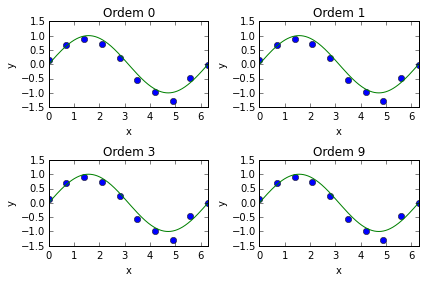

In [1]:
import matplotlib.pyplot as plt                                                  
import numpy as np  
import pylab                                                              
import math  

from pylab import *
import math
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

def generate_sin(n):

    x = np.linspace(0, 2*math.pi, n)
    y = []
    sigma = 0.2
    for i in x:
        mu = math.sin(i)
        s = np.random.normal(mu, sigma)
        y.append(s)
    return x, np.array(y)

# Plot sines and generate datapoints
N = 10
orders = [0, 1, 3, 9]
res = 1000

x, y = generate_sin(N)
linspace = np.linspace(0, 2*math.pi, res)

for i, m in enumerate(orders):
        
    plt.subplot(2, 2, i+1)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(0, 2*math.pi)
    plt.ylim(-1.5, 1.5)
    plt.title('Ordem %d'%m)
    plt.tight_layout()
    plt.plot(x, y, 'o')

    t = np.array([math.sin(i) for i in linspace])
    plt.plot(linspace, t)

plt.show()  
    

###Regressão polinomial
Primeiro criar função base, para calcular solução max verossimilhança (maximum likelihood) e depois produto da função base com target vector

In [2]:
def polynomial_fit(x, t, m):

    # Basis function    
    m += 1 # plus one for the non-optional first element of the bias vector ^0
    phi = np.array(range(m))
    Phi = np.zeros((np.size(x), m))

    for n, x_elem in enumerate(x):
        # create array filled with m copies of the nth datapoint
        x_ar = np.array([x_elem] * m)
        # multiply with the bias vector
        Phi[n] = x_ar ** phi

    basis_function = np.matrix(Phi)

    # solve for w
    return basis_function.T.dot(basis_function).I.dot(basis_function.T).dot(t)

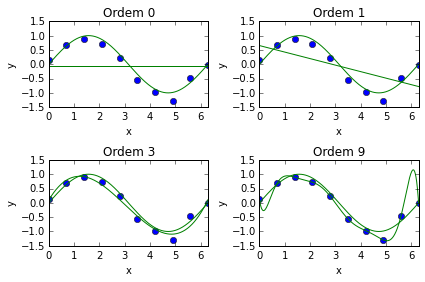

In [3]:
for i, m in enumerate(orders):
    w = polynomial_fit(x, y, m)
    # for each x: sum for all m:  w[m]*x**m
    f = [sum(w.item(p) * (x_point ** p) for p in range(np.size(w, 1))) for x_point in linspace]
    
    plt.subplot(2, 2, i+1)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(0, 2*math.pi)
    plt.ylim(-1.5, 1.5)
    plt.title('Ordem %d'%m)
    plt.tight_layout()
    plt.plot(x, y, 'o')

    t = np.array([math.sin(i) for i in linspace])
    plt.plot(linspace, t)

    plt.plot(linspace, f, color='g')
plt.show()